<a href="https://colab.research.google.com/github/dhanyashree02/Samsung-innovation-Campus/blob/main/Regression/happy_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import kagglehub
import pandas as pd
import os
###############################################################
# Specify the dataset identifier (user/dataset-name) and the file within the dataset
dataset_owner = "priyanshusethi"
dataset_name = "happiness-classification-dataset"
dataset_handle = f"{dataset_owner}/{dataset_name}"
###############################################################
# Download the dataset to a local directory
local_path = kagglehub.dataset_download(dataset_handle)
###############################################################
# List the contents of the downloaded directory to find the correct file path
print(f"Dataset downloaded to: {local_path}")
###############################################################
print("Contents of the dataset:")
###############################################################
for root, dirs, files in os.walk(local_path):
    level = root.replace(local_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')
###############################################################
# Once you find the correct file path, replace "crime_statistics.csv"
# with the correct path and uncomment the line below to load the data into a DataFrame.
file_path_within_dataset = "happydata.csv"
###############################################################
df = pd.read_csv(os.path.join(local_path, file_path_within_dataset))
###############################################################
# display(df.head())
df.head()

100%|██████████| 729/729 [00:00<00:00, 1.43MB/s]

Extracting files...
Dataset downloaded to: /root/.cache/kagglehub/datasets/priyanshusethi/happiness-classification-dataset/versions/1
Contents of the dataset:
1/
    happydata.csv


,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear',
                           max_iter=1000) # 'liblinear' is a good choice for smaller datasets

In [6]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [7]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=25,
                      shuffle=True,
                      random_state=42)

In [8]:
from sklearn.model_selection import cross_val_score

# Define features (X) and target (y)
X = df.drop(['ëvents', 'happy'], axis=1)
y = df['happy']

cv_scores = cross_val_score(model,
                            X, y,
                            cv=skf,
                            scoring='accuracy')

In [9]:
import numpy as np
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.83333333 0.5        0.66666667 0.33333333 0.5        0.66666667
 0.33333333 0.5        0.33333333 0.5        0.83333333 0.5
 0.5        0.5        0.66666667 0.5        0.33333333 0.5
 0.6        0.8        0.2        0.6        0.8        0.8
 1.        ]


In [10]:
print("Mean accuracy:", np.mean(cv_scores))

Mean accuracy: 0.5720000000000001


In [11]:
print("Standard deviation of accuracy:", np.std(cv_scores))

Standard deviation of accuracy: 0.1915271956320216


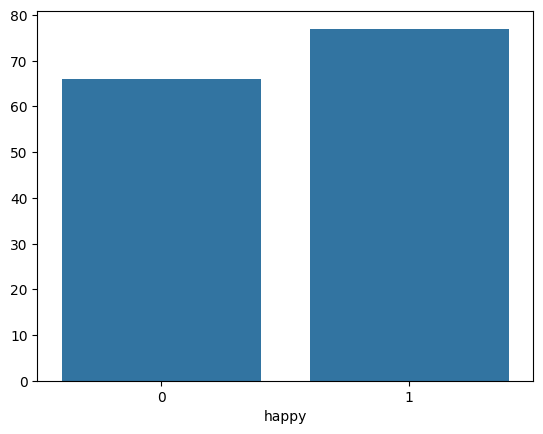

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ser = pd.Series(y)
table = ser.value_counts()
table = table.sort_index()                                         # Has to be sorted for correct labeling.
sns.barplot(x=table.index, y=table.values)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=1234)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(85, 5)
(58, 5)
(85,)
(58,)


In [17]:
LL = LogisticRegression(solver='liblinear',max_iter=200)
LL.fit(X_train,Y_train)
Y_pred_test = LL.predict(X_test)

In [20]:
from sklearn import metrics

conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test)
print(conf_mat)

[[ 9 18]
 [ 9 22]]


In [22]:
accuracy = metrics.accuracy_score(Y_test,Y_pred_test)                      # Alternative way to calculate the accuracy.
sensitivity = metrics.recall_score(Y_test,Y_pred_test, average='weighted')
precision = metrics.precision_score(Y_test,Y_pred_test, average='weighted')
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.534
Sensitvity  = 0.534
Precision   = 0.527


In [23]:
Y_pred_test_prob = LL.predict_proba(X_test)

In [24]:
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Specificity = {}'.format(np.round(specificity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.534
Sensitvity  = 0.71
Specificity = 0.333
Precision   = 0.55


In [25]:
cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []                                                   # True Positive Rate.
FPR = []

In [29]:
# Convert Y_test to binary numerical labels (assuming 'events' is the positive class)
# Y_test_binary = (Y_test == 'events').astype(int) # This line is removed

for cutoff in cutoff_grid:
    Y_pred_test_val = (Y_pred_test_prob[:, 1] > cutoff).astype(int)
    conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test_val)
    sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    TPR.append(sensitivity)
    FPR.append(1-specificity)

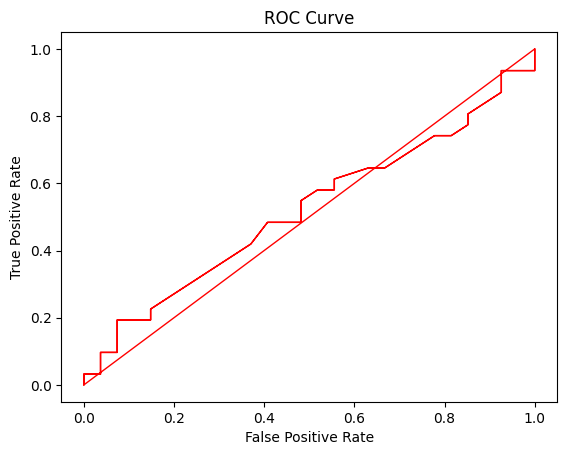

In [30]:
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [32]:
# Get the index of the 'household' class
events_class_index = LL.classes_.tolist().index(1)

# Get the probabilities for the 'household' class
Y_pred_test_prob_events = Y_pred_test_prob[:, events_class_index]

# Calculate FPR, TPR, and cutoffs using metrics.roc_curve
FPR, TPR, cutoffs = metrics.roc_curve(Y_test, Y_pred_test_prob_events, pos_label=1)

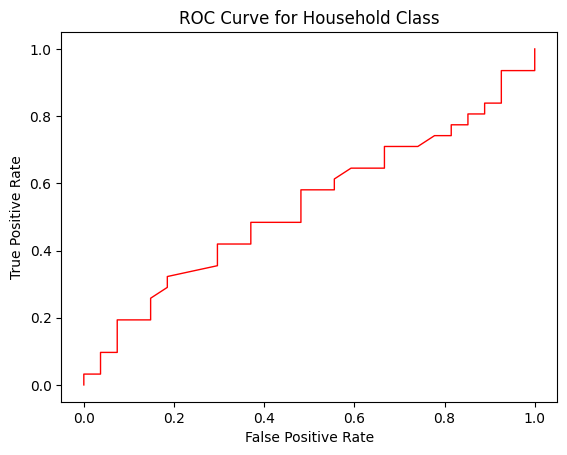

In [33]:
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Household Class')
plt.show()